In [1]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [2]:
wrs = pd.read_csv('../Capstone_csv_file/wrs_td_salary_19-20')

In [3]:
wrs.dtypes

NAME        object
TD           int64
TD_rank    float64
salary       int64
dtype: object

In [4]:
wrs.head()

,NAME,TD,TD_rank,salary
0,Kenny Golladay,11,1.0,799081
1,Cooper Kupp,10,2.0,957940
2,Michael Thomas,9,4.5,19250000
3,Chris Godwin,9,4.5,821041
4,Marvin Jones,9,4.5,8000000


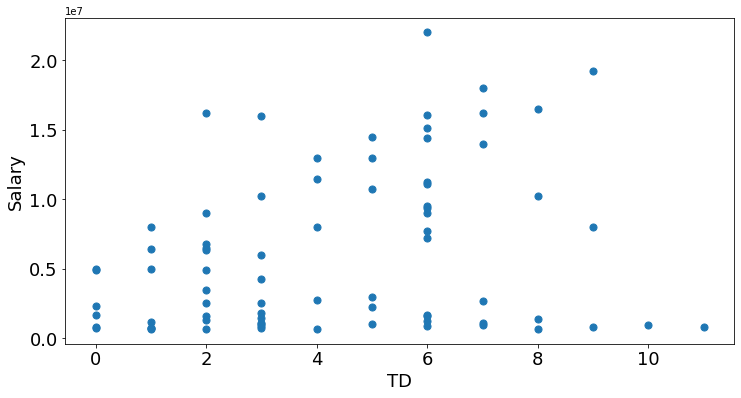

In [5]:
ax = wrs.plot(kind="scatter", x = 'TD',  y = 'salary', figsize = (12,6), s = 50)
plt.xlabel('TD', fontsize=18)
plt.ylabel("Salary", fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=18)

In [6]:
ss = StandardScaler()
X = ss.fit_transform(wrs.loc[:, ['TD', 'salary']])

In [7]:
X.mean(axis = 0)

array([-1.34395419e-16,  7.45018082e-17])

In [8]:
X.std(axis = 0)

array([1., 1.])

In [9]:
km = KMeans(n_clusters = 5, random_state = 27)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=27, tol=0.0001, verbose=0)

In [10]:
km.cluster_centers_

array([[ 0.52043048, -0.79978111],
       [ 0.273226  ,  0.84990059],
       [-0.95507124, -0.53752793],
       [ 0.97363868,  1.85428122],
       [ 1.81825398, -0.72309567]])

In [11]:
km.predict(X)

array([4, 4, 3, 4, 4, 4, 4, 1, 3, 0, 3, 0, 3, 0, 3, 0, 1, 1, 1, 1, 0, 3,
       0, 1, 0, 3, 3, 1, 1, 3, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [12]:
wrs['clusters'] = km.labels_
wrs.head()

,NAME,TD,TD_rank,salary,clusters
0,Kenny Golladay,11,1.0,799081,4
1,Cooper Kupp,10,2.0,957940,4
2,Michael Thomas,9,4.5,19250000,3
3,Chris Godwin,9,4.5,821041,4
4,Marvin Jones,9,4.5,8000000,4


In [13]:
ss.inverse_transform(km.cluster_centers_)

array([[5.66666667e+00, 1.67530500e+06],
       [5.00000000e+00, 1.10970588e+07],
       [1.68750000e+00, 3.17309997e+06],
       [6.88888889e+00, 1.68333333e+07],
       [9.16666667e+00, 2.11327517e+06]])

In [14]:
wrs.groupby('clusters')[['TD', 'salary']].mean()

,TD,salary
clusters,,
0,5.666667,1.675305e+06
1,5.000000,1.109706e+07
2,1.687500,3.173100e+06
3,6.888889,1.683333e+07
4,9.166667,2.113275e+06


In [15]:
centroids = wrs.groupby('clusters')[['TD', 'salary']].mean()

<Figure size 504x504 with 0 Axes>

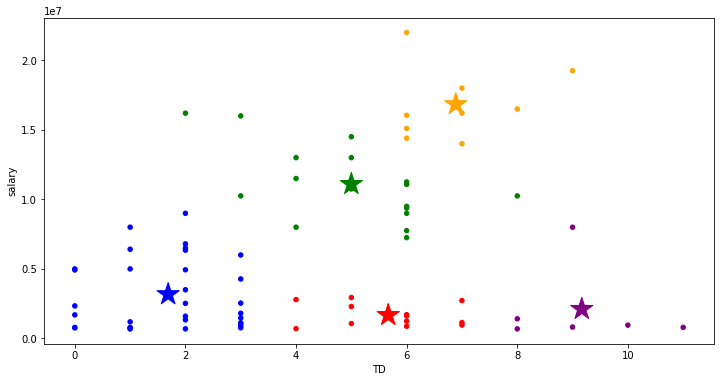

In [16]:
plt.figure(figsize = (7,7));

colors = ['red', 'green', 'blue', 'orange', 'purple']
wrs['color'] = wrs['clusters'].map(lambda p: colors[p])

ax = wrs.plot(    
    kind = 'scatter', 
    x = 'TD', y = 'salary',
    figsize = (12,6),
    c = wrs['color']
);

centroids.plot(
    kind = 'scatter', 
    x = 'TD', y = 'salary', 
    marker = '*', c = colors, s = 550,
    ax = ax
);

In [17]:
km.inertia_

26.63972428468312

In [18]:
silhouette_score(X, km.labels_)

0.42671608855143195